Привет! Меня зовут Александр Арасланов, я провожу ревью твоей работы. Предалагю общаться на «ты», если не против.

В работе ты увидишь комментарии, помеченные разным цветом.

<div class="alert alert-danger">
Красным цветом помечены моменты, которые необходимо доработать, чтобы проект был принят. Уверен, что у тебя все получится. Буду ждать твою работу на повторное ревью. 
</div>

<div class="alert alert-success">
Зеленым цветом помечены оброзцовые решения. Которые можно использовать в дальнейшем.
</div>

<div class="alert alert-warning">
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Можешь учесть это при выполнении следующих работ или доработать проект сейчас, но это не обязательно.
</div>


Будет комфортнее работать над проектом вместе, если ты будешь **писать об изменениях** в проекте по моим рекомендациям. Для этого выбери для своих комментариев 

<div class="alert alert-block alert-info">заметный цвет</div>

Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

Кирилл, к сожалению твой код не отработал до конца и упал на 67 ячейке с ошибкой `ValueError: Palette {} not understood`
Пожалуйста исправь ее и перед отпарвкой убедись в работоспособности кода через **Kernel/Restart and run all**
___

# Маркетинг Яндекс.Афиша

Вас пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши. Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.
Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

Вам предстоит изучить:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

# Оглавление

1. [Шаг 1. Открытие файла с данными и изучение общей информации](#step1)<br><br>

2. [Шаг 2. Расчет метрик и построение графиков](#step2)<br>
    2.1. [Продуктовые метрики](#step2-1)<br>
    2.1.1. [MAU, WAU, DAU](#step2-1-1)<br>
    2.1.2. [Среднеее кол-во сессий на юзера](#step2-1-2)<br>
    2.1.3. [Средняя продолжительность сессии](#step2-1-3)<br>
    2.1.4. [Когорты](#step2-1-4)<br><br>
    2.2. [Метрики электронной коммерции](#step2-2)<br>
    2.2.1. [Среднее время до первой покупки](#step2-2-1)<br>
    2.2.2. [Среднее кол-во покупок на 1 покупателя](#step2-2-2)<br>
    2.2.3. [Изменение среднего чека](#step2-2-3)<br>
    2.2.4. [Накопительный LTV](#step2-2-4)<br><br>
    2.3. [Маркетинговые метрики](#step2-3)<br>
    2.3.1. [Общая сумма расходов на маркетинг](#step2-3-1)<br>
    2.3.2. [CAC покупателя](#step2-3-2)<br>
    2.3.3. [ROMI по когортам и источникам](#step2-3-3)<br><br>
3. [Шаг 3. Сформулируйте выводы и рекомендации](#step3)<br>
    3.1. [Источники трафика, на которые сделать упор](#step3-3)<br>
    3.2. [Выводы по маркетинговым, продуктовым и метрикам электронной коммерции](#step3-2)<br>
    3.3. [Перспективные когорты](#step3-3)

## Шаг 1. Открытие файла с данными

<a id="step1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
try:
    df_costs  = pd.read_csv('./datasets/costs.csv')
    df_orders = pd.read_csv('./datasets/orders_log.csv')
    df_visits = pd.read_csv('./datasets/visits_log.csv')
except:
    df_costs  = pd.read_csv('/datasets/costs.csv')
    df_orders = pd.read_csv('/datasets/orders_log.csv')
    df_visits = pd.read_csv('/datasets/visits_log.csv')

In [3]:
print(df_costs.info(), df_orders.info(), df_visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None None None


In [4]:
display(df_costs.head(), df_orders.head(), df_visits.head())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
# Приведение заголовков столбцов
df_costs.columns = ['source_id', 'date', 'costs']
df_orders.columns = ['buy_timestamp', 'revenue', 'uid']
df_visits.columns = ['device', 'end_timestamp', 'source_id', 'start_timestamp', 'uid']

In [6]:
# Приведение типов полей даты
df_costs['date'] = pd.to_datetime(df_costs['date'])
df_orders['buy_timestamp'] = pd.to_datetime(df_orders['buy_timestamp'])
df_visits['end_timestamp'] = pd.to_datetime(df_visits['end_timestamp'])
df_visits['start_timestamp'] = pd.to_datetime(df_visits['start_timestamp'])

In [7]:
df_orders.query('revenue < 0')

,buy_timestamp,revenue,uid


In [8]:
df_visits.query('start_timestamp > end_timestamp')

,device,end_timestamp,source_id,start_timestamp,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


<div class="alert alert-warning">

**Комментарий ревьюера**
    
Молодец, при обработке данных сделал все необходимое 👍 Можно было бы еще проверить данные на логику. Может быть есть записи, когда `start_ts > end_ts` или `revenue<0`? </div>

<div class="alert alert-block alert-info">
Действительно, есть 2 записи, где таймстамп начала визита больше его окончания. Поскольку таких строки всего 2 - их можно либо проигнорировать, либо удалить.
</div>

## Шаг 2. Рассчитайте метрики и постройте графики

<a id="step2"></a>

Посчитайте метрики трёх видов:
- продуктовые,
- метрики электронной коммерции,
- маркетинговые.

Отобразите на графиках изменения каждой метрики во времени. Всякий раз старайтесь подобрать наиболее подходящий тип визуализации: в некоторых случаях может быть уместна тепловая карта когортного анализа.

После каждого пункта сформулируйте выводы.

### 2.1. Продуктовые метрики

<a id="step2-1"></a>

- [x] 2.1.1. Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период. Отобразите изменения метрик во времени на графиках;
- [x] 2.1.2. Определите, сколько раз за день пользователи в среднем заходят на сайт. Постройте график, отражающий изменения метрики во времени;
- [x] 2.1.3. Исследуйте, сколько времени пользователи проводят на сайте. Узнайте продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, постройте график распределения. Изменение продолжительности сессий во времени изучать необязательно;
- [x] 2.1.4. Рассчитайте Retention Rate, применяя когортный анализ. Покажите изменения метрики во времени на графике. Найдите средний Retention Rate на второй месяц «жизни» когорт.

#### 2.1.1. Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период. Отобразите изменения метрик во времени на графиках;
<a id="step2-1-1"></a>

In [9]:
# Создание колонок с годом, месяцем, неделей и днем
df_visits['session_year'] = df_visits['start_timestamp'].dt.year
df_visits['session_month'] = df_visits['start_timestamp'].dt.month
df_visits['session_week'] = df_visits['start_timestamp'].dt.week
df_visits['session_date'] = df_visits['start_timestamp'].dt.date

In [10]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
device             359400 non-null object
end_timestamp      359400 non-null datetime64[ns]
source_id          359400 non-null int64
start_timestamp    359400 non-null datetime64[ns]
uid                359400 non-null uint64
session_year       359400 non-null int64
session_month      359400 non-null int64
session_week       359400 non-null int64
session_date       359400 non-null object
dtypes: datetime64[ns](2), int64(4), object(2), uint64(1)
memory usage: 24.7+ MB


<div class="alert alert-warning">

**Комментарий ревьюера**
    
Аккуратнее с методом `astype('datetime64[W]')` он оберзает недели не по календарному году. Дату недели лучше искать через разницу даты дня и дня недели</div>

In [11]:
# Первый день месяца, недели
df_visits['visit_month']    = df_visits['start_timestamp'].astype('datetime64[M]')
df_visits['first_day_week'] = (pd.to_datetime(df_visits['start_timestamp'], unit='d') - pd.to_timedelta(df_visits['start_timestamp'].dt.dayofweek, unit='d')).astype('datetime64[D]')
df_visits['session_date']   = df_visits['start_timestamp'].astype('datetime64[D]')

In [12]:
df_visits.head()

,device,end_timestamp,source_id,start_timestamp,uid,session_year,session_month,session_week,session_date,visit_month,first_day_week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-01,2017-12-18
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-01,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01,2017-06-26
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-05-01,2018-05-14
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-01,2017-12-25


In [13]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 11 columns):
device             359400 non-null object
end_timestamp      359400 non-null datetime64[ns]
source_id          359400 non-null int64
start_timestamp    359400 non-null datetime64[ns]
uid                359400 non-null uint64
session_year       359400 non-null int64
session_month      359400 non-null int64
session_week       359400 non-null int64
session_date       359400 non-null datetime64[ns]
visit_month        359400 non-null datetime64[ns]
first_day_week     359400 non-null datetime64[ns]
dtypes: datetime64[ns](5), int64(4), object(1), uint64(1)
memory usage: 30.2+ MB


MAU: 23228


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


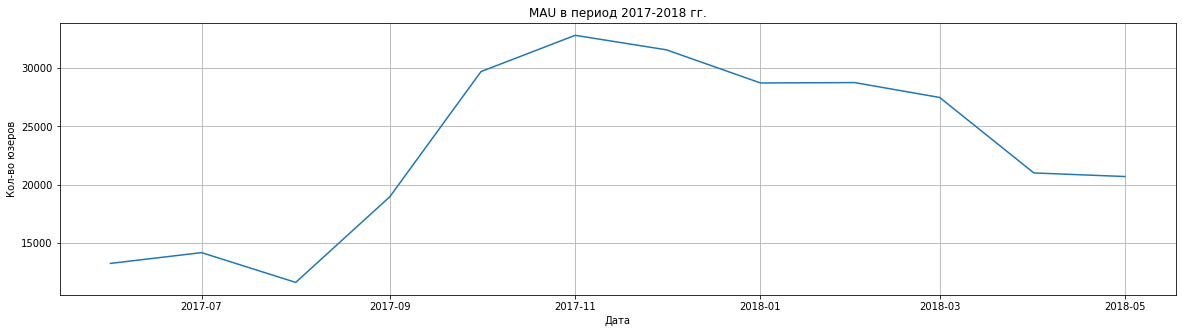

WAU: 5716


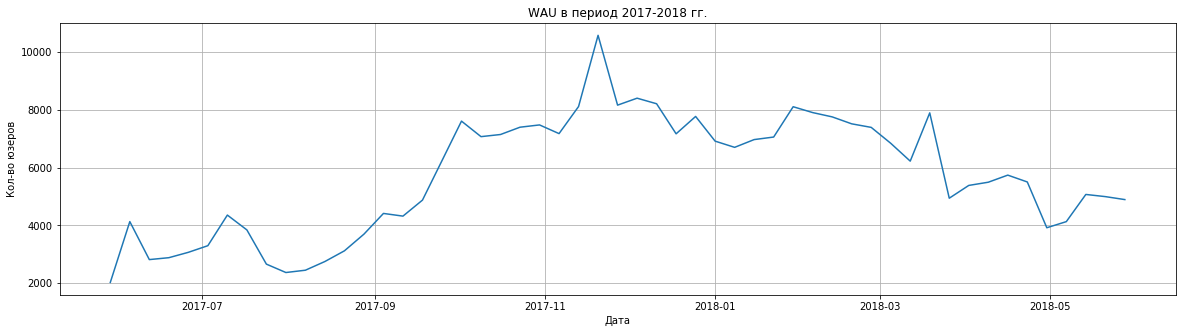

DAU: 908


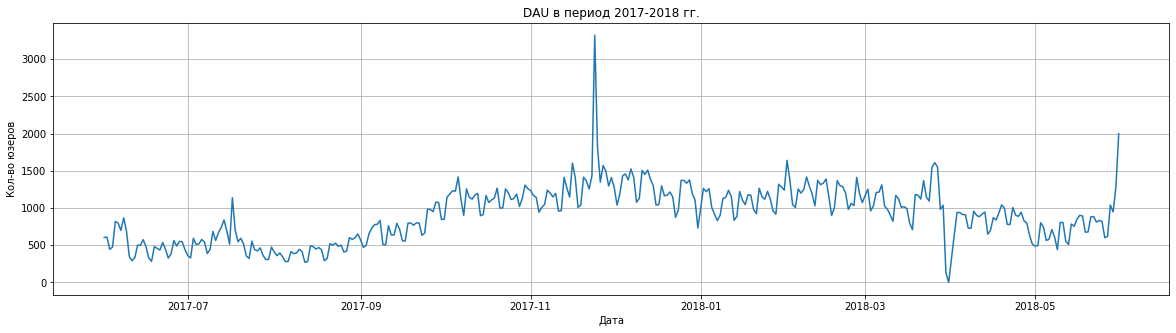

In [14]:
XAU = {'MAU' : ['session_year', 'visit_month'], 'WAU' : ['session_year', 'first_day_week'], 'DAU' : ['session_year', 'session_date']}

for au, columns in XAU.items():
    
    # Группировка по периоду и вывод среднего кол-ва активных юзеров
    active_users = df_visits.groupby(columns).agg({'uid' : 'nunique'}).mean().round().astype('int')
    print(au +': {}'.format(active_users['uid']))
    
    
    # Визуализация MAU, WAU, DAU
    fig, ax = plt.subplots(figsize = (20, 5))
    ax.plot(
        columns[1],
        'uid',
        data = df_visits.groupby(columns).agg({'uid' : 'nunique'}).reset_index()
    )
    ax.set(xlabel = 'Дата', ylabel = 'Кол-во юзеров', title = au +' в период 2017-2018 гг.')
    ax.grid()
    
    plt.show()

<div class="alert alert-success">

**Комментарий ревьюера**
    
Хорошая визуализация метрик в динамике 👍</div>

###### <div style="background:yellow;padding: 20px 10px">Вывод</div>

DAU растет с начала датасета. В НГ пик активных пользователей. К маю 2018 DAU уменьшается от 1000-1500 к 500-1000. В конце графика виден резкий скачок. Возможно, внесли изменение в проект, что вызвало повышение интереса.

#### 2.1.2. Определите, сколько раз за день пользователи в среднем заходят на сайт. Постройте график, отражающий изменения метрики во времени;
<a id="step2-1-2"></a>

In [15]:
# Создание копии дф с данными визитов
df_users = df_visits.copy()

# Группировка юзеров по количеству
df_users = df_users.groupby(['session_year', 'session_date']).agg({'uid' : ['count', 'nunique']})

df_users.columns = ['users_cnt', 'users_uniq']
df_users['visits_per_user'] = df_users['users_cnt'] / df_users['users_uniq']
df_users

users_cnt  users_uniq  visits_per_user
session_year session_date                                        
2017         2017-06-01          664         605         1.097521
             2017-06-02          658         608         1.082237
             2017-06-03          477         445         1.071910
             2017-06-04          510         476         1.071429
             2017-06-05          893         820         1.089024
...                              ...         ...              ...
2018         2018-05-27          672         620         1.083871
             2018-05-28         1156        1039         1.112608
             2018-05-29         1035         948         1.091772
             2018-05-30         1410        1289         1.093871
             2018-05-31         2256        1997         1.129695

[364 rows x 3 columns]

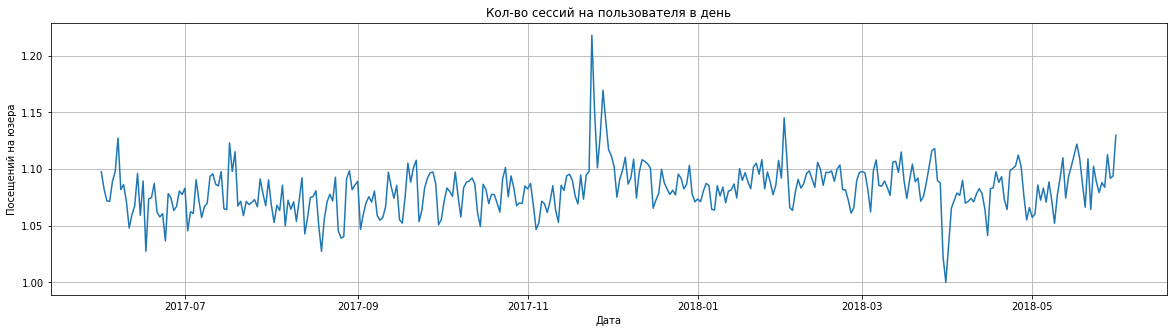

In [16]:
fig, ax = plt.subplots(figsize = (20, 5))
ax.plot(
    'session_date',
    'visits_per_user',
    data = df_users.reset_index()
)
ax.set(xlabel = 'Дата', ylabel = 'Посещений на юзера', title = 'Кол-во сессий на пользователя в день')
ax.grid()

plt.show()

###### <div style="background:yellow;padding: 20px 10px">Вывод</div>

Количество сессий на пользователя особо не меняется и находится в диапазоне 1.05 - 1.1. Есть всплески к Новому году и в феврале. В конце графика показатель начинает расти. Возможно, что-то обновили и пользователи стали чаще заходить на сайт.

---

#### 2.1.3. Исследуйте, сколько времени пользователи проводят на сайте. Узнайте продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, постройте график распределения. Изменение продолжительности сессий во времени изучать необязательно;

<a id="step2-1-3"></a>

In [17]:
# Рассчет ASL (Average Session Lenght)
df_visits['session_duration'] = (df_visits['end_timestamp'] - df_visits['start_timestamp']).dt.seconds
df_visits.head()

,device,end_timestamp,source_id,start_timestamp,uid,session_year,session_month,session_week,session_date,visit_month,first_day_week,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-01,2017-12-18,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-01,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01,2017-06-26,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-05-01,2018-05-14,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-01,2017-12-25,0


In [18]:
df_visits['session_duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

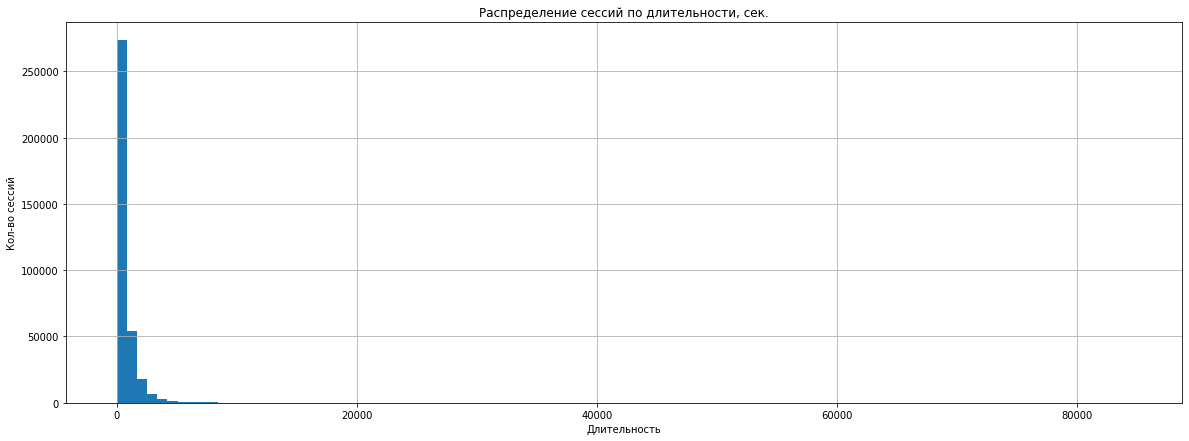

In [19]:
# Гистограмма распределения длительности сессии
fig, ax = plt.subplots(figsize = (20, 7))
ax.hist(df_visits['session_duration'], bins = 100)
ax.set(xlabel = 'Длительность', ylabel = 'Кол-во сессий', title = 'Распределение сессий по длительности, сек.')
plt.grid()
plt.show()

Поскольку распределение далеко от нормального, то нельзя брать среднее или медиану, поэтому возьмем моду для вычленения наиболее часто встречающегося элемента.

###### <div style="background:yellow;padding: 20px 10px">Вывод</div>

<div class="alert alert-success">

**Комментарий ревьюера**
    
Здесь тоже все хорошо</div>

In [20]:
print('Средняя длительность сессии {:.0f} сек.'.format(df_visits['session_duration'].mode()[0]))

Средняя длительность сессии 60 сек.


---

#### 2.1.4. Рассчитайте Retention Rate, применяя когортный анализ. Покажите изменения метрики во времени на графике. Найдите средний Retention Rate на второй месяц «жизни» когорт.

<a id="step2-1-4"></a>

In [21]:
# Создание копии таблицы с визитами
df_retention = df_visits.copy()

In [22]:
# Извлечение таймстампа первого визита
first_visit = df_retention.groupby('uid')['start_timestamp'].min()
first_visit.name = 'first_visit_datetime'

first_visit.count()

228169

In [23]:
# Объединение двух таблиц покупок: исходная дата визита и дата первого визита по uid для рассчета ретеншена
try:
    df_retention = df_retention.join(first_visit, on = 'uid')
except:
    print('Данные уже сведены')

df_retention.head()

,device,end_timestamp,source_id,start_timestamp,uid,session_year,session_month,session_week,session_date,visit_month,first_day_week,session_duration,first_visit_datetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-01,2017-12-18,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-01,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01,2017-06-26,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-05-01,2018-05-14,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-01,2017-12-25,0,2017-12-27 14:06:00


In [24]:
# Создание столбца с месяцем первого визита
try:
    df_retention['first_visit_month'] = df_retention['first_visit_datetime'].astype('datetime64[M]')
except:
    print('Данные уже извлечены')

df_retention.head()

,device,end_timestamp,source_id,start_timestamp,uid,session_year,session_month,session_week,session_date,visit_month,first_day_week,session_duration,first_visit_datetime,first_visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-01,2017-12-18,1080,2017-12-20 17:20:00,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-01,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01,2017-06-26,0,2017-07-01 01:54:00,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-05-01,2018-05-14,1440,2018-03-09 20:05:00,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-01,2017-12-25,0,2017-12-27 14:06:00,2017-12-01


In [25]:
df_retention['lifetime'] = ((df_retention['visit_month'] - df_retention['first_visit_month']) / np.timedelta64(1, 'M')).round().astype('int')
df_retention.head()

,device,end_timestamp,source_id,start_timestamp,uid,session_year,session_month,session_week,session_date,visit_month,first_day_week,session_duration,first_visit_datetime,first_visit_month,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-01,2017-12-18,1080,2017-12-20 17:20:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-01,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01,2017-06-26,0,2017-07-01 01:54:00,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-05-01,2018-05-14,1440,2018-03-09 20:05:00,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-01,2017-12-25,0,2017-12-27 14:06:00,2017-12-01,0


In [26]:
# Определение LT когорты
cohorts = df_retention.groupby(['first_visit_month', 'lifetime']).agg({'uid' : 'nunique'}).reset_index()
cohorts.head()

,first_visit_month,lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


In [27]:
# Создание таблицы с юзерами в 0 период
initial_users_cnt = cohorts.query('lifetime == 0')[['first_visit_month', 'uid']]
initial_users_cnt

,first_visit_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [28]:
# Объединение когорт и юзеров в 0 период по столбцу first_visit_month
cohorts = cohorts.merge(initial_users_cnt, on = 'first_visit_month')
cohorts.head()

,first_visit_month,lifetime,uid_x,uid_y
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


In [29]:
# Переименование столбцов uid
cohorts.rename(columns = {'uid_x' : 'uid', 'uid_y' : 'cohort_users'}, inplace = True)
cohorts['first_visit_month'] = cohorts['first_visit_month'].dt.strftime('%Y-%m')
cohorts.head()

,first_visit_month,lifetime,uid,cohort_users
0,2017-06,0,13259,13259
1,2017-06,1,1043,13259
2,2017-06,2,713,13259
3,2017-06,3,814,13259
4,2017-06,4,909,13259


In [30]:
# Вычисление Retention Rate
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

<div class="alert alert-warning">

**Комментарий ревьюера**
    
Отличный расчет retention rate 👍Молодец, что убрал нулевой возраст когорт, чтобы скорректировать градиентную заливку. В таблицу можно еще добавить расчет среднего по времени жизни среди всех когорт `visits_retention_pivot.loc['mean'] = pivot.mean()`

Какой еще вывод можно сделать? Например, виодно, что показатель за первый месяц жизни для свежих когорт хуже? Получается что тренд убывающий, можно сделать вывод, что качество трафика ухудшилось. Так как даже после 0 месяца жизни остается уже меньше людей, чем в старых когортах </div>

<div class="alert alert-block alert-info">
Можно подробностей, пожалуйста. Что-то не совсем понял :/ 
В таблицу cohorts и этот столбец тоже визуализировать в хитмапе или отдельный линейный график по времени?
</div>

<div class="alert alert-warning">

**Комментарий ревьюера V2**
    
сохрани сводную таблицу в отдельную переменную. Добавиь для нее эту строчку кода, только вместо cohorts подставь переменную в которую сохранил сводную таблицу. `cohorts.loc['mean'] = cohorts.mean()` И только после этого уже визуализировать на тепловой карте. именно эту переменную </div>

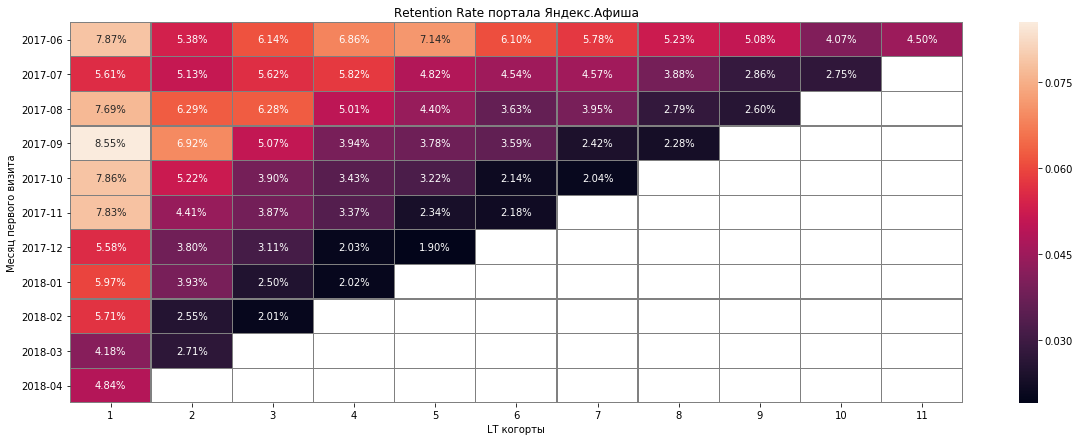

In [31]:
# Визуализация Retention Rate
fig, ax = plt.subplots(figsize = (20, 7))

sns.heatmap(
    cohorts.query('lifetime > 0').pivot_table(
        index   = 'first_visit_month',
        columns = 'lifetime',
        values  = 'retention',
        aggfunc = 'sum'
    ), 
    annot = True, 
    fmt = '.2%', 
    linewidths = 0.25, 
    linecolor = 'gray'
)
ax.set(xlabel = 'LT когорты', ylabel = 'Месяц первого визита', title = 'Retention Rate портала Яндекс.Афиша')

plt.show()

###### <div style="background:yellow;padding: 20px 10px">Вывод</div>

#### Найдите средний Retention Rate на второй месяц «жизни» когорт

In [32]:
print('Средний Retention Rate на второй месяц "жизни" когорт: {:.2%}'.format(cohorts.query('lifetime == 1')['retention'].mean()))

Средний Retention Rate на второй месяц "жизни" когорт: 6.52%


###### <div style="background:orange; padding: 20px 10px;">Продуктовые df</div>
- df_users: группировка юзеров по session_year, session_date и среднее кол-во визитов
- df_retention: копия df_visits со столбцами даты первого визита и длительности сессии
- cohorts: когорты из df_retention с группировкой по first_visit_month, lifetime

---

### 2.2. Метрики электронной коммерции

<a id="step2-2"></a>

- [x] 2.2.1. Исследуйте, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Изучать изменение этой метрики во времени необязательно;
- [x] 2.2.2. Применяя когортный анализ или другой метод, рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно;
- [x] 2.2.3. Рассчитайте средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Постройте график, отражающий изменения метрики во времени;
- [x] 2.2.4. Выясните, как меняется LTV на покупателя по когортам. Помните, что LTV — накопительная метрика. Рассчитайте средний LTV по когортам за 6 месяцев; в расчёт включайте когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразите изменения метрики во времени на графике;

#### 2.2.1. Исследуйте, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Изучать изменение этой метрики во времени необязательно;

<a id="step2-2-1"></a>

In [33]:
# Вычисление даты и времени 1-й покупки
first_buy = df_orders.groupby('uid')['buy_timestamp'].min()
first_buy.name = 'first_buy_datetime'

In [34]:
# Объединение таблицы таймстампов визита и покупки по uid
first_order_time = pd.merge(first_visit, first_buy, on = 'uid')

In [35]:
# Вычисление времени до первой покупки
first_order_time['time_to_first_buy'] = (pd.to_timedelta(first_order_time['first_buy_datetime'] - first_order_time['first_visit_datetime']) / np.timedelta64(1, 's')).round().astype('int')

In [36]:
first_order_time.head()

,first_visit_datetime,first_buy_datetime,time_to_first_buy
uid,,,
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,9241320
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,4740
2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,71040
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


In [37]:
# Категоризация времени до первой покупки
def check_time_to_first_buy(row):
    if row['time_to_first_buy'] == 0:
        return 'Автоматическая покупка'
    
    elif row['time_to_first_buy'] <= 3600:
        return 'В первый час'
    
    elif 3600 < row['time_to_first_buy'] <= 86400:
        return 'В первый день'
    
    else:
        return 'Больше первого дня'

first_order_time['category'] = first_order_time.apply(check_time_to_first_buy, axis = 1)

In [38]:
first_order_time.groupby('category')['time_to_first_buy'].count()

category
Автоматическая покупка     2455
Больше первого дня        10156
В первый день              3759
В первый час              20153
Name: time_to_first_buy, dtype: int64

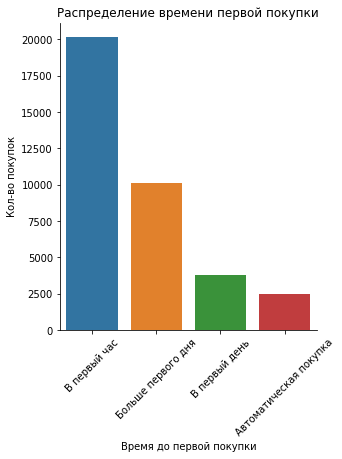

In [39]:
ax = sns.catplot(
    data = first_order_time
        .groupby('category')['time_to_first_buy']
        .count()
        .sort_values(ascending = False)
        .reset_index(),
    x = 'category',
    y = 'time_to_first_buy',
    kind = 'bar'
)

ax.set(xlabel = 'Время до первой покупки', ylabel = 'Кол-во покупок', title = 'Распределение времени первой покупки')
ax.set_xticklabels(rotation = 45)

plt.show()

<div class="alert alert-success">

**Комментарий ревьюера**

Интересный подход, молодец, что ввел условные сегменты для времени до первой покупки</div>

###### <div style="background:yellow;padding: 20px 10px">Вывод</div>

In [40]:
print('Среднее время до совершения первой покупки: {:.0f} секунд или {:.0f} минут или {:.0f} часов или {:.0f} дней'
      .format(first_order_time['time_to_first_buy'].mean(), 
              first_order_time['time_to_first_buy'].mean() / 60, 
              first_order_time['time_to_first_buy'].mean() / 60 / 60,
              first_order_time['time_to_first_buy'].mean() / 60 / 60 / 24,
             )
     )

Среднее время до совершения первой покупки: 1460411 секунд или 24340 минут или 406 часов или 17 дней


<div class="alert alert-block alert-info">
Несмотря на то, что много покупок совершается в первый час, примерно половина всех покупок совершается после 1-го дня. Вероятно, есть выбросы по длительности, что сильно скашивает среднее время до первой покупки до 17 дней. Верно?
</div>

<div class="alert alert-warning">

**Комментарий ревьюера V2**
    
Да, верно</div>

---

#### 2.2.2. Применяя когортный анализ или другой метод, рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно;

<a id="step2-2-2"></a>

In [41]:
# Создание df_ecom из копии df_orders
df_ecom = df_orders.copy()

In [42]:
# Объединение таблицы df_ecom с серией first_buy по uid
df_ecom = df_ecom.merge(first_buy, on = 'uid')

In [43]:
# Создание месяца покупки: первый и текущий
df_ecom['buy_month'] = df_ecom['buy_timestamp'].astype('datetime64[M]')
df_ecom['first_buy_month'] = df_ecom['first_buy_datetime'].astype('datetime64[M]')

In [44]:
# Рассчет LT для когорт покупок
df_ecom['lifetime_months'] = ((df_ecom['buy_month'] - df_ecom['first_buy_month']) / np.timedelta64(1, 'M')).round().astype('int')

# Срез юзеров, у которых LT <= 6 месяцев
average_buys = df_ecom[df_ecom['lifetime_months'] <= 6].copy()

average_buys.head()

,buy_timestamp,revenue,uid,first_buy_datetime,buy_month,first_buy_month,lifetime_months
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0


In [45]:
average_buys['first_buy_month'] = average_buys['first_buy_month'].dt.strftime('%Y-%m')

In [46]:
# Группировка юзеров по когортам покупок
average_buys = average_buys.groupby(['first_buy_month', 'lifetime_months']).agg({'uid' : 'nunique', 'buy_timestamp' : 'count'})

In [47]:
# Переименование столбцов для понятности
average_buys = average_buys.rename(columns = {'uid' : 'users_cnt', 'buy_timestamp' : 'orders_cnt'})

In [48]:
average_buys.head()

users_cnt  orders_cnt
first_buy_month lifetime_months                       
2017-06         0                     2023        2354
                1                       61         177
                2                       50         174
                3                       54         226
                4                       88         292

In [49]:
# Рассчет среднего числа покупок
average_buys['mean_orders'] = average_buys['orders_cnt'] / average_buys['users_cnt']

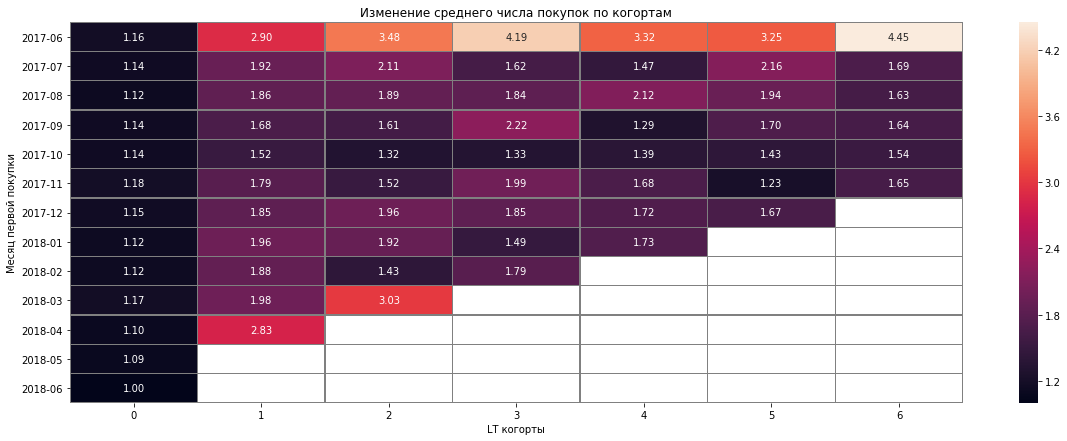

In [50]:
fig, ax = plt.subplots(figsize = (20, 7))

sns.heatmap(
    average_buys.pivot_table(
        index = 'first_buy_month',
        columns = 'lifetime_months',
        values = 'mean_orders'
    ),
    annot = True, 
    fmt = '.2f', 
    linewidths = 0.25, 
    linecolor = 'gray'
)
ax.set(xlabel = 'LT когорты', ylabel = 'Месяц первой покупки', title = 'Изменение среднего числа покупок по когортам')

plt.show()


In [51]:
print('Среднее количество покупок на одного покупателя за 6 месяцев составляет: {:.2f} шт.'.format(average_buys['mean_orders'].mean()))

Среднее количество покупок на одного покупателя за 6 месяцев составляет: 1.81 шт.


#### 2.2.3. Рассчитайте средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Постройте график, отражающий изменения метрики во времени;

<a id="step2-2-3"></a>

In [52]:
# Извлечение даты покупки для построения графика
df_ecom['buy_date'] = df_ecom['buy_timestamp'].dt.date
df_ecom['buy_week'] = df_ecom['buy_timestamp'].astype('datetime64[W]')

In [53]:
df_ecom.head()

,buy_timestamp,revenue,uid,first_buy_datetime,buy_month,first_buy_month,lifetime_months,buy_date,buy_week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01


<div class="alert alert-danger">

**Комментарий ревьюера**

Мммм, график по дням слишком детальный. Удобнее было бы посмотрть на средний чек по неделям или по месяцам. Он даже не показывает вырос у нас средний чек или нет за год</div>

<div class="alert alert-block alert-info">
Заменил на месяц. Ср. чек вроде особо не изменился. 
Как нарисовать трендлайн какой-нибудь, как в экселе можно, чтобы примерно проверить направление?
</div>

<div class="alert alert-success">

**Комментарий ревьюера V2**

Можешь заменить линейный график на https://seaborn.pydata.org/generated/seaborn.regplot.html или вот https://stackoverflow.com/questions/60582253/how-can-you-add-a-trendline-to-a-seaborns-lineplot</div>

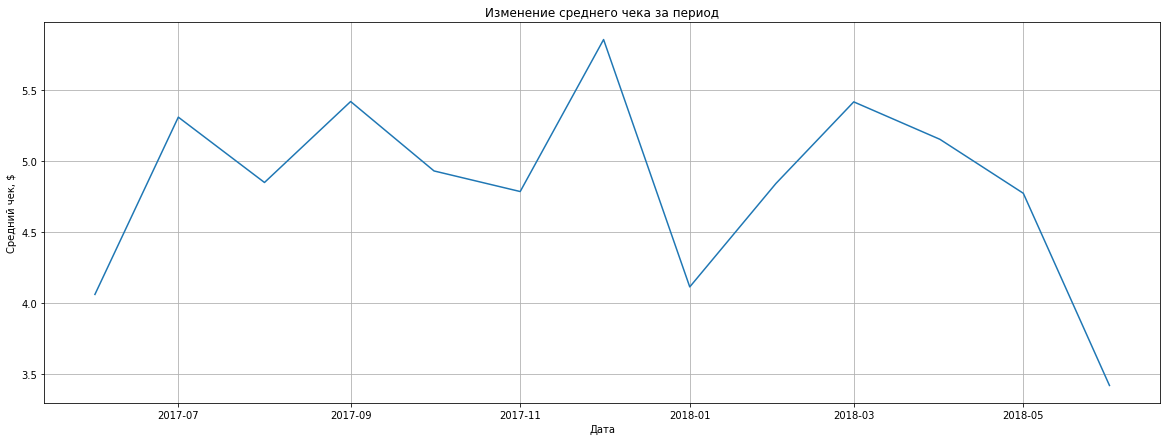

In [54]:
fig, ax = plt.subplots(figsize = (20, 7))

ax.plot(
    'buy_month',
    'revenue',
    data = df_ecom.groupby('buy_month').agg({'revenue' : 'mean'}).reset_index()
)

ax.set(xlabel = 'Дата', ylabel = 'Средний чек, $', title = 'Изменение среднего чека за период')
ax.grid()
plt.show()

###### <div style="background:yellow;padding: 20px 10px">Вывод</div>
На графике изменения цены среднего чека есть очевидные пики. Скорее всего это связано с какими-либо праздниками. Самый большой пик - в преддверии Нового года.

---

#### 2.2.4. Выясните, как меняется LTV на покупателя по когортам. Помните, что LTV — накопительная метрика. Рассчитайте средний LTV по когортам за 6 месяцев; в расчёт включайте когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразите изменения метрики во времени на графике;

<a id="step2-2-4"></a>

In [55]:
df_ecom.head()

,buy_timestamp,revenue,uid,first_buy_datetime,buy_month,first_buy_month,lifetime_months,buy_date,buy_week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01


In [56]:
all_cohorts = df_ecom.copy()
all_cohorts = all_cohorts.groupby(['first_buy_month', 'buy_month']).agg({'revenue' : 'sum'}).reset_index()
all_cohorts.head()

,first_buy_month,buy_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [57]:
# Подсчет кол-ва новых покупателей в месяц
new_buyers = df_ecom.groupby('first_buy_month').agg({'uid' : 'nunique'}).reset_index()
new_buyers.columns = ['first_buy_month', 'users_cnt']
new_buyers.head()

,first_buy_month,users_cnt
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [58]:
# Объединение таблицы с суммой ревеню и покупателями по first_buy_month
all_cohorts = all_cohorts.merge(new_buyers, on = 'first_buy_month')
all_cohorts.head(20)

,first_buy_month,buy_month,revenue,users_cnt
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,2023
2,2017-06-01,2017-08-01,885.34,2023
3,2017-06-01,2017-09-01,1931.30,2023
4,2017-06-01,2017-10-01,2068.58,2023
5,2017-06-01,2017-11-01,1487.92,2023
6,2017-06-01,2017-12-01,1922.74,2023
7,2017-06-01,2018-01-01,1176.56,2023
8,2017-06-01,2018-02-01,1119.15,2023
9,2017-06-01,2018-03-01,1225.51,2023


In [59]:
# Вычисление LT когорты для рассчета LTV
all_cohorts['lifetime'] = ((all_cohorts['buy_month'] - all_cohorts['first_buy_month']) / np.timedelta64(1, 'M')).round().astype('int')

In [60]:
# Вычисление LTV для каждого месяца
all_cohorts['ltv'] = all_cohorts['revenue'] / all_cohorts['users_cnt']

In [61]:
# Изменение отображения first_buy_month на год-месяц
all_cohorts['first_buy_month'] = all_cohorts['first_buy_month'].dt.strftime('%Y-%m')

<div class="alert alert-danger">

**Комментарий ревьюера**

Хороший расчет LTV 👍 Правда я бы лучше оставил все когорты. И вывел бы две тепловых карты. Одну общую для всех когорт за все время. Другую для когорт проживших 6 месяцев (квадрат 6 на 6) до 6 месяца жизни. Первая карта даст понимание общей карты по когортам. Вторая удобна для сравнения когорт между собой</div>

<div class="alert alert-block alert-info">
Не понял как сделать сравнение 6х6.
    
Типа просуммировать LTV ппо всей длине когорты и разделить на 6, чтобы получился квадрат для визуализации? 
</div>

<div class="alert alert-warning">

**Комментарий ревьюера**

Взять просто срез 6 на 7 от полной таблицы 

`all_cohorts.pivot_table(
        index = 'first_buy_month',
        columns = 'lifetime',
        values = 'ltv',
        aggfunc = 'mean'
    ).cumsum(axis = 1).iloc[:6,:7]`</div>

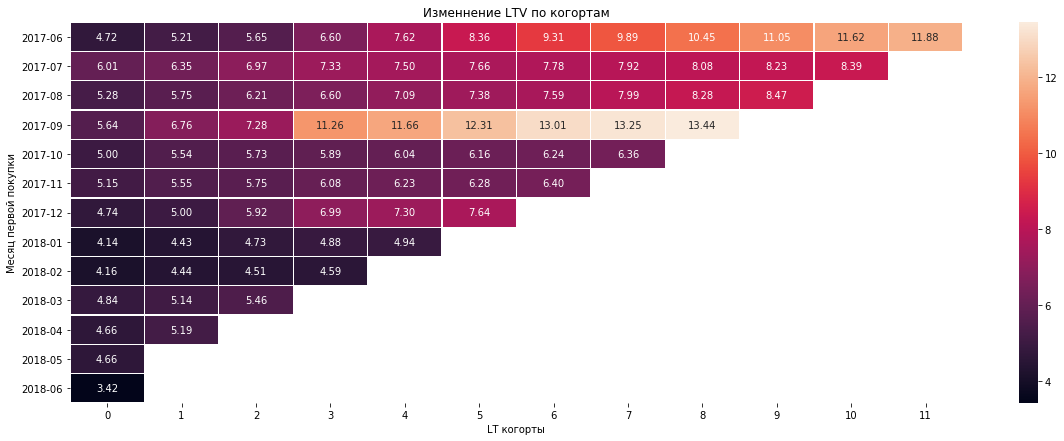

In [62]:
fig, ax = plt.subplots(figsize = (20, 7))

sns.heatmap(
    all_cohorts.pivot_table(
        index = 'first_buy_month',
        columns = 'lifetime',
        values = 'ltv',
        aggfunc = 'mean'
    )
    .cumsum(axis = 1),
    
    annot = True, 
    fmt = '.2f', 
    linewidths = 0.25, 
    linecolor = 'white'
)
ax.set(xlabel = 'LT когорты', ylabel = 'Месяц первой покупки', title = 'Изменнение LTV по когортам')
plt.show()

In [63]:
# Подсчет средней когорты по накопительному LTV
mean_ltv = all_cohorts.pivot_table(
     index = 'first_buy_month',
     columns = 'lifetime',
     values = 'ltv',
     aggfunc = 'mean'
    ).cumsum(axis = 1).mean(axis = 0)
mean_ltv

lifetime
0      4.801682
1      5.395666
2      5.821811
3      6.689763
4      7.298634
5      7.969053
6      8.387686
7      9.083583
8     10.062084
9      9.251340
10    10.004616
11    11.879234
dtype: float64

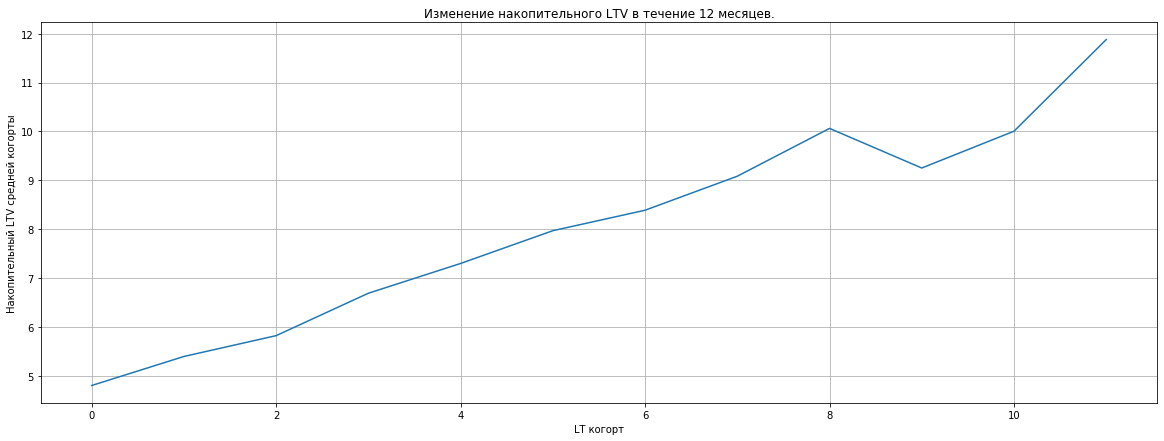

In [64]:
# 2.2.4. Выясните, как меняется LTV на покупателя по когортам. 
# Помните, что LTV — накопительная метрика. 
# Рассчитайте средний LTV по когортам за 6 месяцев; в расчёт включайте когорты, «прожившие» не менее 6 месяцев. 
# Маржинальность сервиса — 100%. 
# Отразите изменения метрики во времени на графике;

fig, ax = plt.subplots(figsize = (20, 7))

ax.plot(
    mean_ltv
)

ax.set(xlabel = 'LT когорт', ylabel = 'Накопительный LTV средней когорты', title = 'Изменение накопительного LTV в течение 12 месяцев.')

plt.grid()
plt.show()

<div class="alert alert-danger">

**Комментарий ревьюера**

просдка связана с тем, что когорты, сентярбря, которая имеет огромный LTV просто не прожило еще столько времени. Минус такой визуалзиации как раз в том, что ты делаем ее не для квадрата 6 на 6, про который я написал выше</div>

<div class="alert alert-block alert-info">
Сделал тоже самое, но не "срезал" когорты по 6 месяцам - результат получился таким же. Про квадрат 6х6 не понял. Подскажи, пожалуйста.
</div>

<div class="alert alert-warning">

**Комментарий ревьюера V2**

Он и не должен был измениться, потому что когорта сентября как дожила до 8 месяца жизни так и дожила. Так как дальшей она не живет, показатель резно просел. Визуализировать таким графиком нужно не полную таблицу, а именну ту, которая 6 на 6. </div>

###### <div style="background:yellow;padding: 20px 10px">Вывод</div>
Средний LTV на покупателя в течение 12 месяцев растет. Есть проседание в 10 месяце, потом восстанавливается. С чем это связано? 

###### <div style="background:orange; padding: 20px 10px;">Еком df</div>

- first_order_time - время первого визита и первой покупки + категории. ['first_visit_datetime', 'first_buy_datetime', 'time_to_first_buy', 'category']

- df_ecom - копия df_orders + first_buy_month, buy_month, lifetime_month. ['buy_timestamp', 'revenue', 'uid', 'first_buy_datetime', 'buy_month', 'first_buy_month', 'lifetime_months', 'buy_date']

- average_buys - группировка df_ecom по среднему кол-ву покупок по когортам. ['users_cnt', 'orders_cnt', mean_orders']

- buy_cohorts_6 - таблица, в которой у юзеров в когортах есть 6 месяцев LT. ['first_buy_month', 'buy_month', 'revenue', 'users_cnt', 'lifetime', 'ltv']

---

### 2.3. Маркетинговые метрики

<a id="step2-3"></a>

Посчитайте и отобразите на графиках, как маркетинговые метрики различаются по рекламным источникам.
Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому важно определить «главный» источник для каждого и учитывать это в расчётах. Например, главным может стать первый источник перехода.

- [x] 2.3.1. Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени;
- [x] 2.3.2. Рассчитайте средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразите изменения метрик на графиках;
- [x] 2.3.3. Рассчитайте ROMI по когортам в разрезе источников. Сравните окупаемость за одинаковые периоды жизни когорт. Обратите внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Постройте графики, отражающие изменения метрик во времени.

#### 2.3.1. Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени;

<a id="step2-3-1"></a>

In [65]:
# Общая сумма расходов на маркетинг
print('Общая сумма расходов на маркетинг: $ {:.2f}'.format(df_costs['costs'].sum()))

Общая сумма расходов на маркетинг: $ 329131.62


In [66]:
# Группировка расходов по источникам
df_costs.groupby('source_id').agg({'costs' : 'sum'}).reset_index()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [67]:
# Извлечение месяца из даты для будущей визуализации по месяцам
df_costs['month'] = df_costs['date'].astype('datetime64[M]')

In [68]:
df_costs.groupby(['source_id', 'month']).agg({'costs' : 'sum'}).reset_index().head()

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75


<div class="alert alert-danger">

**Комментарий ревьюера**

История есть не для всех источников. Цвета тяжело разлечать между собой. Чтобы сделать легенду, передай параметр `legend='full'`.  попробуй измениться цветовую палитру на отличные друг от дурга цвета

Можешь изменить на визуализацию `df_costs.pivot_table(index='month','columns='source_id', values='costs').plot()`</div>

<div class="alert alert-block alert-info">
Изменил цвет
</div>

<div class="alert alert-success">

**Комментарий ревьюера V2**

Хорошо, исправления принял 👍</div>

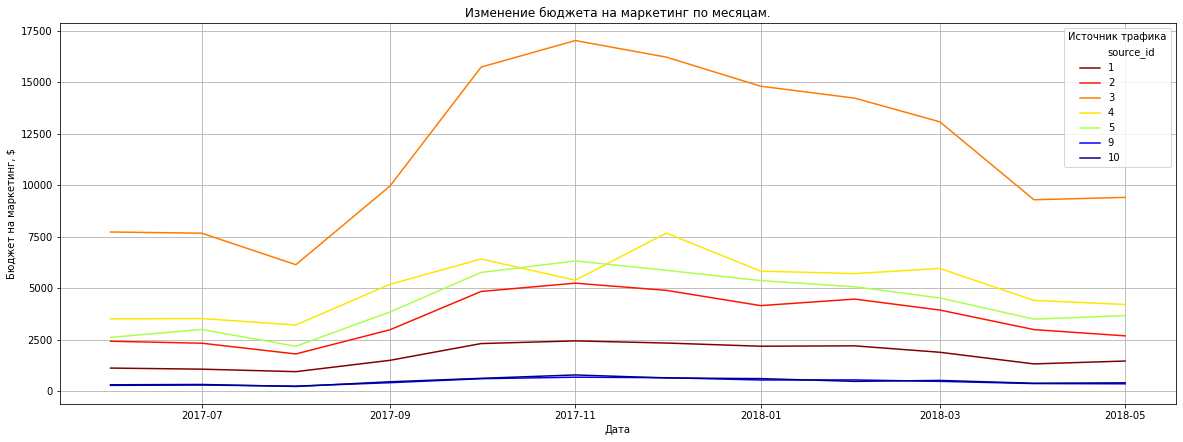

In [69]:
# Визуализация изменения во времени и по источнику

fig, ax = plt.subplots(figsize = (20, 7))

ax = sns.lineplot(
    data = df_costs.groupby(['source_id', 'month']).agg({'costs' : 'sum'}).reset_index(),
    x = 'month',
    y = 'costs',
    hue = 'source_id',
    legend = 'full',
    palette = 'jet_r'
)

ax.set(xlabel = 'Дата', ylabel = 'Бюджет на маркетинг, $', title = 'Изменение бюджета на маркетинг по месяцам.')
ax.legend(title = 'Источник трафика')

plt.grid()
plt.show()

###### <div style="background:yellow;padding: 20px 10px">Вывод</div>
Топовый по бюджету источник №3. Так же по нему увеличение бюджета с августа по ноябрь.

На втором месте по бюджету источники №№ 2, 4, 5. Аналогично имеют увеличение бюджета с августа по ноябрь.

Источник № 10 самый маленький по бюджету и особо не изменился по объему за весь период.

Можно предположить, что источник № 3 - это либо реклама, либо какие-то платные размещения.

---

#### 2.3.2. Рассчитайте средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразите изменения метрик на графиках;

<a id="step2-3-2"></a>

In [70]:
# Создание копии df_costs
df_marketing = df_costs.copy()

In [71]:
# Создание копии first_order_time
df_buyers = first_order_time.copy()


# В таблице уже есть таймстамп первого визита, из него надо достать дату и месяц.
df_buyers['first_visit_month'] = df_buyers['first_visit_datetime'].astype('datetime64[M]')
df_buyers['first_visit_date']  = df_buyers['first_visit_datetime'].astype('datetime64[D]')
df_buyers['first_order_month'] = df_buyers['first_buy_datetime'].astype('datetime64[M]')
df_buyers['first_order_date']  = df_buyers['first_buy_datetime'].astype('datetime64[D]')

df_buyers = df_buyers.reset_index()
df_buyers.head()

,uid,first_visit_datetime,first_buy_datetime,time_to_first_buy,category,first_visit_month,first_visit_date,first_order_month,first_order_date
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,9241320,Больше первого дня,2017-09-01,2017-09-18,2018-01-01,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0,Автоматическая покупка,2017-06-01,2017-06-03,2017-06-01,2017-06-03
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,4740,В первый день,2017-10-01,2017-10-11,2017-10-01,2017-10-11
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,71040,В первый день,2018-01-01,2018-01-27,2018-01-01,2018-01-28
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0,Автоматическая покупка,2017-11-01,2017-11-24,2017-11-01,2017-11-24


In [72]:
# Объединение таблицы покупателей с таблицей визитов по полям uid, first_visit_date+session_date, чтобы получить source_id
df_buyers = pd.merge(df_buyers, df_visits, left_on = ['uid', 'first_visit_datetime'], right_on = ['uid', 'start_timestamp'])[['uid', 'source_id', 'device', 'first_visit_month', 'first_visit_date', 'first_order_month', 'first_order_date']]

df_buyers.head()

,uid,source_id,device,first_visit_month,first_visit_date,first_order_month,first_order_date
0,313578113262317,2,desktop,2017-09-01,2017-09-18,2018-01-01,2018-01-03
1,1575281904278712,10,touch,2017-06-01,2017-06-03,2017-06-01,2017-06-03
2,2429014661409475,3,desktop,2017-10-01,2017-10-11,2017-10-01,2017-10-11
3,2464366381792757,5,desktop,2018-01-01,2018-01-27,2018-01-01,2018-01-28
4,2551852515556206,5,desktop,2017-11-01,2017-11-24,2017-11-01,2017-11-24


In [73]:
# Подсчет уникальных покупателей по источнику и дате первой покупки
df_uniq_buyers = df_buyers.groupby(['first_order_date', 'source_id']).agg({'uid' : 'nunique'}).reset_index()
df_uniq_buyers.head()

,first_order_date,source_id,uid
0,2017-06-01,1,14
1,2017-06-01,2,11
2,2017-06-01,3,33
3,2017-06-01,4,10
4,2017-06-01,5,13


In [74]:
df_marketing.head()

,source_id,date,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [75]:
# Объединение расходов и юзеров по источнику и дате
df_marketing = df_marketing.merge(df_uniq_buyers, left_on = ['source_id', 'date'], right_on = ['source_id', 'first_order_date'])[['source_id', 'month', 'date', 'costs', 'uid']]

In [76]:
df_marketing.head()

,source_id,month,date,costs,uid
0,1,2017-06-01,2017-06-01,75.20,14
1,1,2017-06-01,2017-06-02,62.25,7
2,1,2017-06-01,2017-06-03,36.53,7
3,1,2017-06-01,2017-06-04,55.00,3
4,1,2017-06-01,2017-06-05,57.08,18


In [77]:
# Переименование столбца uid
df_marketing = df_marketing.rename(columns = {'uid' : 'buyers_cnt'})

In [78]:
df_marketing.head()

,source_id,month,date,costs,buyers_cnt
0,1,2017-06-01,2017-06-01,75.20,14
1,1,2017-06-01,2017-06-02,62.25,7
2,1,2017-06-01,2017-06-03,36.53,7
3,1,2017-06-01,2017-06-04,55.00,3
4,1,2017-06-01,2017-06-05,57.08,18


In [79]:
# Рассчет CAC,
# Если было 0 покупателей в день, заполнение расходом целиком
df_marketing['cac'] = df_marketing.apply(lambda x: x['costs'] / x['buyers_cnt'] if x['buyers_cnt'] > 0  else x['costs'], axis = 1)

In [80]:
print('Средний CAC на покупателя по всему проекту за весь период: $ {:.2f}'.format(df_marketing['cac'].mean()))

Средний CAC на покупателя по всему проекту за весь период: $ 10.19


In [81]:
# Рассчет среднего CAC на покупателя по всему проекту
mean_cac_per_user = sum(df_marketing['costs']) / sum(df_marketing['buyers_cnt'])
print('Средний CAC на покупателя по всему проекту за весь период: $ {:.2f}'.format(mean_cac_per_user))

Средний CAC на покупателя по всему проекту за весь период: $ 8.98


###### <div style="background:yellow;padding: 20px 10px">Вывод</div> - ВОПРОС
Тут интересная штука: есть дни, когда не было привлечено ни одного покупателя. Поэтому использование .mean() по столбцу CAC и деления суммы расходов на сумму покупателей дают разные средние. Не уверен.

Заполнял в день, когда было 0 покупателей, ячейку CAC значением расхода в этот же день.



Почему так? 

<div class="alert alert-warning">

**Комментарий ревьюера**

Потому что при расчете через `mean()` там проставляются тот расход, который был. а просто NAN</div>

<div class="alert alert-block alert-info">
И как считать надо? Чтобы получить правильную цифру
</div>

<div class="alert alert-success">

**Комментарий ревьюера V2**

И так и так правильно. Просто второй вариант показывает тебе САС в общем за все время. А второй вариант средний от САС по месяцам. На вопрос как правильно или как надо заказчику, ответит тебе уже сам заказчик</div>

---

In [82]:
# Группировка данных по источникам, месяцам
df_cac = df_marketing.groupby(['source_id', 'month']).agg({'costs' : 'sum', 'buyers_cnt' : 'sum'}).copy()

In [83]:
df_cac.head()

costs  buyers_cnt
source_id month                          
1         2017-06-01  1103.93         190
          2017-07-01  1072.88         160
          2017-08-01   925.63         113
          2017-09-01  1502.01         227
          2017-10-01  2315.75         340

In [84]:
# Рассчет среднего CAC на покупателя по источнику
df_cac['cac'] = df_cac['costs'] / df_cac['buyers_cnt']

In [85]:
df_cac = df_cac.reset_index()

In [86]:
print('Средний CAC по источнику трафика за весь период:')

for source in df_cac['source_id'].unique():
    mean_cac = df_cac[df_cac['source_id'] == source]['cac'].mean()

    print('{} = ${:.2f}'.format(source, mean_cac))

Средний CAC по источнику трафика за весь период:
1 = $7.18
2 = $12.48
3 = $13.80
4 = $6.44
5 = $7.45
9 = $4.50
10 = $4.32


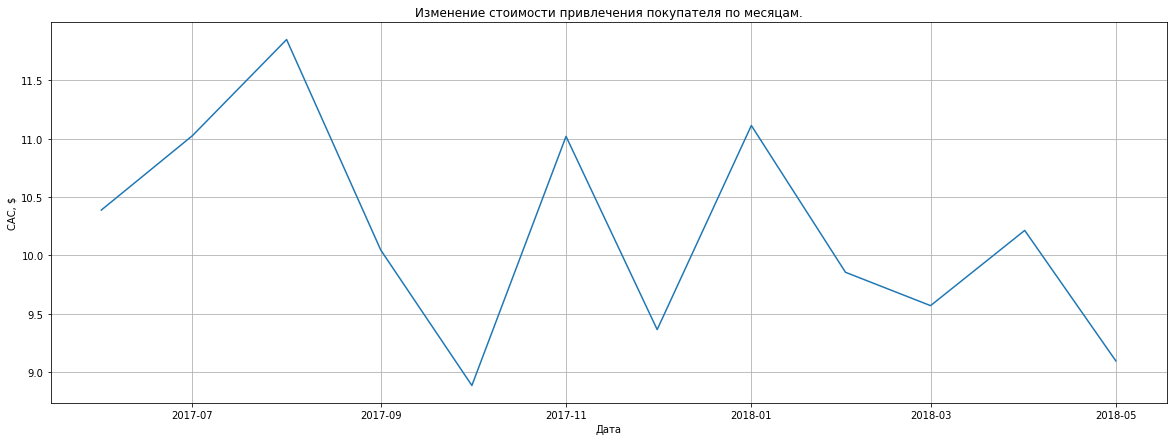

In [87]:
# Визуализация изменения CAC по проекту за весь период 
fig, ax = plt.subplots(figsize = (20, 7))

ax = sns.lineplot(
    data = df_marketing.groupby('month').agg({'cac' : 'mean'}).reset_index(),
    x = 'month',
    y = 'cac'
)

ax.set(xlabel = 'Дата', ylabel = 'CAC, $', title = 'Изменение стоимости привлечения покупателя по месяцам.')

plt.grid()
plt.show()

<div class="alert alert-danger">

**Комментарий ревьюера**

Хороший расчет САС в дианмике по источникам 👍 Но есть проблемы с визуалзиаций. Замечаний такие же как в визуализации расходов по источникам</div>

<div class="alert alert-block alert-info">
Исправил
</div>

<div class="alert alert-success">

**Комментарий ревьюера V2**

Исправления принял</div>

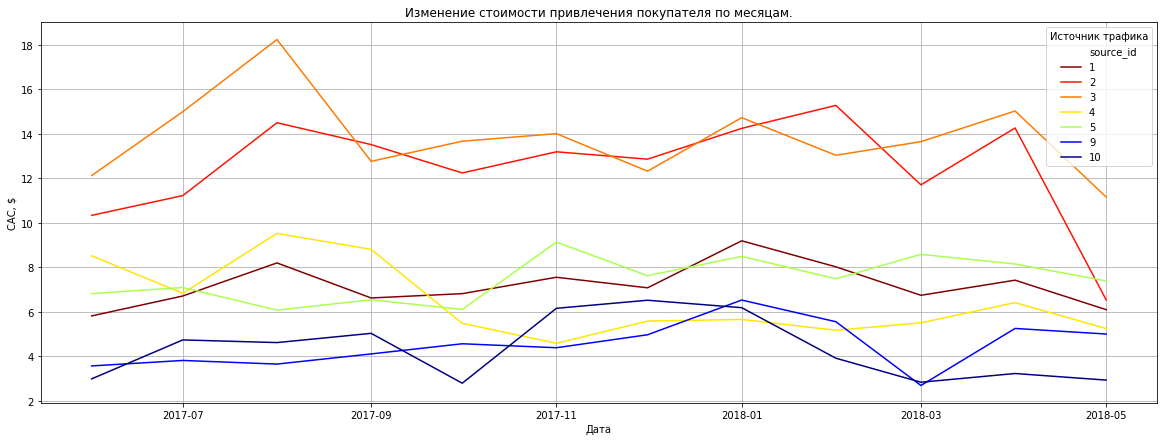

In [88]:
# Визуализация изменения CAC по источнику за весь период
fig, ax = plt.subplots(figsize = (20, 7))

ax = sns.lineplot(
    data = df_cac,
    x = 'month',
    y = 'cac',
    hue = 'source_id',
    legend = 'full',
    palette = 'jet_r'
)

ax.set(xlabel = 'Дата', ylabel = 'CAC, $', title = 'Изменение стоимости привлечения покупателя по месяцам.')
ax.legend(title = 'Источник трафика')

plt.grid()
plt.show()

###### <div style="background:yellow;padding: 20px 10px">Вывод</div>
Стоимость привлечения для всего проекта на протяжении года скачет от 8.5 до 10.5 долларов, но планомерно снижается. 

- Источники 2 и 3 дороже всех и в диапазоне 10-14 долларов. Остальные на уровне 4-10 долларов.
- Источник 4 заметно подешевел к ноябрю 2017 года.
- Источник 1 и 5 постепенно растут на протяжении всего периода времени.
- Источник 9 делает пике и рост в 3-4 месяце 2018 года. Возможно, скоратили расходы и потом добавили.

---

#### 2.3.3. Рассчитайте ROMI по когортам в разрезе источников. Сравните окупаемость за одинаковые периоды жизни когорт. Обратите внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Постройте графики, отражающие изменения метрик во времени.

<a id="step2-3-3"></a>

In [89]:
# Данные по покупателям
df_buyers.head()

,uid,source_id,device,first_visit_month,first_visit_date,first_order_month,first_order_date
0,313578113262317,2,desktop,2017-09-01,2017-09-18,2018-01-01,2018-01-03
1,1575281904278712,10,touch,2017-06-01,2017-06-03,2017-06-01,2017-06-03
2,2429014661409475,3,desktop,2017-10-01,2017-10-11,2017-10-01,2017-10-11
3,2464366381792757,5,desktop,2018-01-01,2018-01-27,2018-01-01,2018-01-28
4,2551852515556206,5,desktop,2017-11-01,2017-11-24,2017-11-01,2017-11-24


In [90]:
# Данные по покупкам
df_ecom.head()

,buy_timestamp,revenue,uid,first_buy_datetime,buy_month,first_buy_month,lifetime_months,buy_date,buy_week
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0,2017-06-01,2017-06-01


In [91]:
# Объединение покупателей и покупок, чтобы получить source_id 
df_romi = pd.merge(df_buyers, df_ecom, on = 'uid', how = 'left').copy()
df_romi.head()

,uid,source_id,device,first_visit_month,first_visit_date,first_order_month,first_order_date,buy_timestamp,revenue,first_buy_datetime,buy_month,first_buy_month,lifetime_months,buy_date,buy_week
0,313578113262317,2,desktop,2017-09-01,2017-09-18,2018-01-01,2018-01-03,2018-01-03 21:51:00,0.55,2018-01-03 21:51:00,2018-01-01,2018-01-01,0,2018-01-03,2017-12-28
1,1575281904278712,10,touch,2017-06-01,2017-06-03,2017-06-01,2017-06-03,2017-06-03 10:13:00,1.22,2017-06-03 10:13:00,2017-06-01,2017-06-01,0,2017-06-03,2017-06-01
2,1575281904278712,10,touch,2017-06-01,2017-06-03,2017-06-01,2017-06-03,2017-06-03 17:39:00,1.83,2017-06-03 10:13:00,2017-06-01,2017-06-01,0,2017-06-03,2017-06-01
3,2429014661409475,3,desktop,2017-10-01,2017-10-11,2017-10-01,2017-10-11,2017-10-11 18:33:00,73.33,2017-10-11 18:33:00,2017-10-01,2017-10-01,0,2017-10-11,2017-10-05
4,2464366381792757,5,desktop,2018-01-01,2018-01-27,2018-01-01,2018-01-28,2018-01-28 15:54:00,2.44,2018-01-28 15:54:00,2018-01-01,2018-01-01,0,2018-01-28,2018-01-25


In [92]:
# Группировка покупателей по когортам: LT, revenue
df_romi = df_romi.groupby(['source_id', 'first_buy_month', 'lifetime_months']).agg({'uid' : 'nunique', 'revenue' : 'sum'})
df_romi.head(10)

uid  revenue
source_id first_buy_month lifetime_months              
1         2017-06-01      0                190  1378.70
                          1                 16   414.98
                          2                 10   419.43
                          3                  9   714.24
                          4                 12   811.20
                          5                 15   389.34
                          6                  9   490.48
                          7                 11   479.23
                          8                  8   432.15
                          9                  7   316.30

In [93]:
# Объединение данных по ревеню и расходам
df_romi = pd.merge(df_romi.reset_index(), df_cac, left_on = ['source_id', 'first_buy_month'], right_on = ['source_id', 'month'])
df_romi.head(10)

,source_id,first_buy_month,lifetime_months,uid,revenue,month,costs,buyers_cnt,cac
0,1,2017-06-01,0,190,1378.70,2017-06-01,1103.93,190,5.810158
1,1,2017-06-01,1,16,414.98,2017-06-01,1103.93,190,5.810158
2,1,2017-06-01,2,10,419.43,2017-06-01,1103.93,190,5.810158
3,1,2017-06-01,3,9,714.24,2017-06-01,1103.93,190,5.810158
4,1,2017-06-01,4,12,811.20,2017-06-01,1103.93,190,5.810158
5,1,2017-06-01,5,15,389.34,2017-06-01,1103.93,190,5.810158
6,1,2017-06-01,6,9,490.48,2017-06-01,1103.93,190,5.810158
7,1,2017-06-01,7,11,479.23,2017-06-01,1103.93,190,5.810158
8,1,2017-06-01,8,8,432.15,2017-06-01,1103.93,190,5.810158
9,1,2017-06-01,9,7,316.30,2017-06-01,1103.93,190,5.810158


In [94]:
# Рассчет LTV по когортам
df_romi['ltv'] = df_romi['revenue'] / df_romi['buyers_cnt']

In [95]:
df_romi.head()

,source_id,first_buy_month,lifetime_months,uid,revenue,month,costs,buyers_cnt,cac,ltv
0,1,2017-06-01,0,190,1378.70,2017-06-01,1103.93,190,5.810158,7.256316
1,1,2017-06-01,1,16,414.98,2017-06-01,1103.93,190,5.810158,2.184105
2,1,2017-06-01,2,10,419.43,2017-06-01,1103.93,190,5.810158,2.207526
3,1,2017-06-01,3,9,714.24,2017-06-01,1103.93,190,5.810158,3.759158
4,1,2017-06-01,4,12,811.20,2017-06-01,1103.93,190,5.810158,4.269474


In [96]:
# Рассчет ROMI
df_romi['romi'] = df_romi['ltv'] / df_romi['cac']

In [97]:
cumulative_romi = df_romi.pivot_table(
    index = ['source_id', 'first_buy_month'], 
    columns ='lifetime_months', 
    values = 'romi', 
    aggfunc = 'mean'
).cumsum(axis = 1).mean(axis = 0).round(2)
cumulative_romi

lifetime_months
0     0.70
1     0.76
2     0.84
3     0.95
4     1.05
5     1.16
6     1.25
7     1.36
8     1.47
9     1.50
10    1.74
11    2.19
dtype: float64

###### <div style="background:yellow;padding: 20px 10px">Вывод</div>

In [98]:
print('В среднем когорты окупаются на {} месяц жизни.'.format(cumulative_romi[cumulative_romi > 1].index.min()))

В среднем когорты окупаются на 4 месяц жизни.


---

In [99]:
# Удаление дня из даты для построения графика
df_romi['first_buy_month_trimmed'] = df_romi['first_buy_month'].dt.strftime('%Y-%m')

In [100]:
# Максимальный ROMI, чтобы отобразить графики в одном цвете
romi_max = df_romi.groupby(['source_id', 'first_buy_month']).agg({'romi': 'sum'}).max()

<div class="alert alert-success">

**Комментарий ревьюера**

Отличный расчет окупаемости когорт источников 👍 Хорошо, что сделал его такой детальный. Можно было бы еще вывести общую сводную таблицу по всем источник, чтобы по ней можно было сразу понять, какие источники окупились и на какой месяц. Индксы будут источники, колонки временем жизни</div>

<div class="alert alert-block alert-info">
Вроде бы добавил, но не уверен, что правильно.
</div>

<div class="alert alert-success">

**Комментарий ревьюера V2**

Да, все верно 👌</div>

In [101]:
#  Функция подсветки ячеек, когда затраты на маркетин окупились
def highlight_romi(row):
    return ['background-color: yellow' if value >= 1 else '' for value in row]


df_romi.pivot_table(
    index = 'source_id', 
    columns ='lifetime_months', 
    values = 'romi', 
    aggfunc = 'mean'
).cumsum(axis = 1).round(2).style.apply(highlight_romi, axis = 1)

lifetime_months,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.9,1.05,1.22,1.39,1.52,1.61,1.72,1.91,2.12,2.3,2.47,2.76
2,0.55,0.68,0.8,0.95,1.03,1.1,1.17,1.23,1.27,1.3,1.39,1.43
3,0.34,0.36,0.37,0.38,0.39,0.4,0.4,0.41,0.41,0.42,0.42,0.42
4,0.76,0.79,0.81,0.84,0.87,0.91,0.98,0.99,1.01,1.05,1.12,1.13
5,0.66,0.71,0.75,1.06,1.12,1.19,1.23,1.27,1.31,1.37,1.38,1.4
9,0.92,0.99,1.08,1.17,1.23,1.28,1.35,1.4,1.53,1.56,1.58,nan
10,0.81,0.83,0.84,0.87,0.88,0.89,0.9,0.91,0.92,0.94,nan,nan


Источник трафика: 1


/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:109: FutureWarning: `item` has been deprecated and will be removed in a future version
  ret = ex.item()


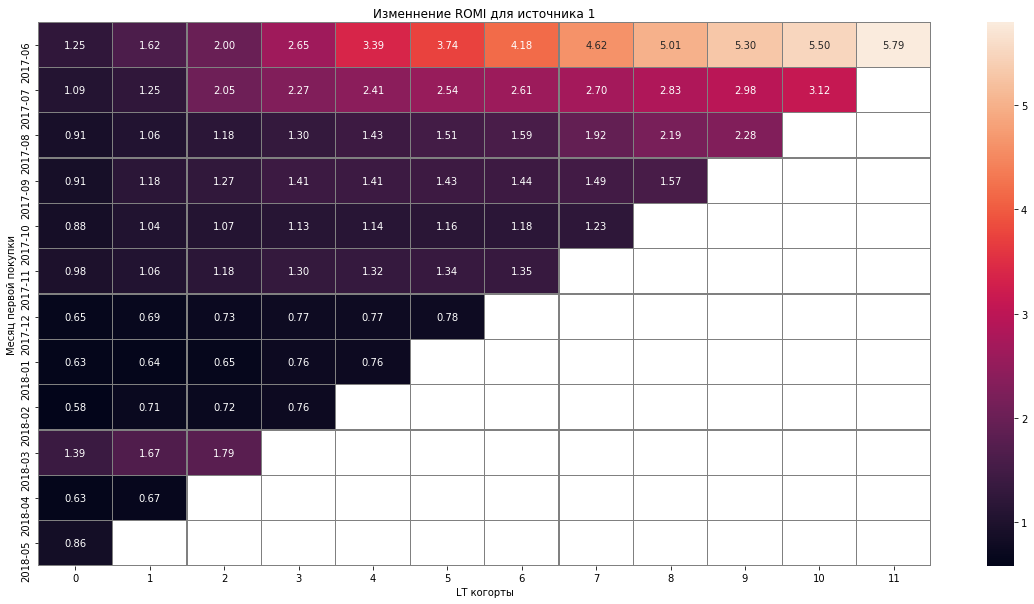

Источник трафика: 2


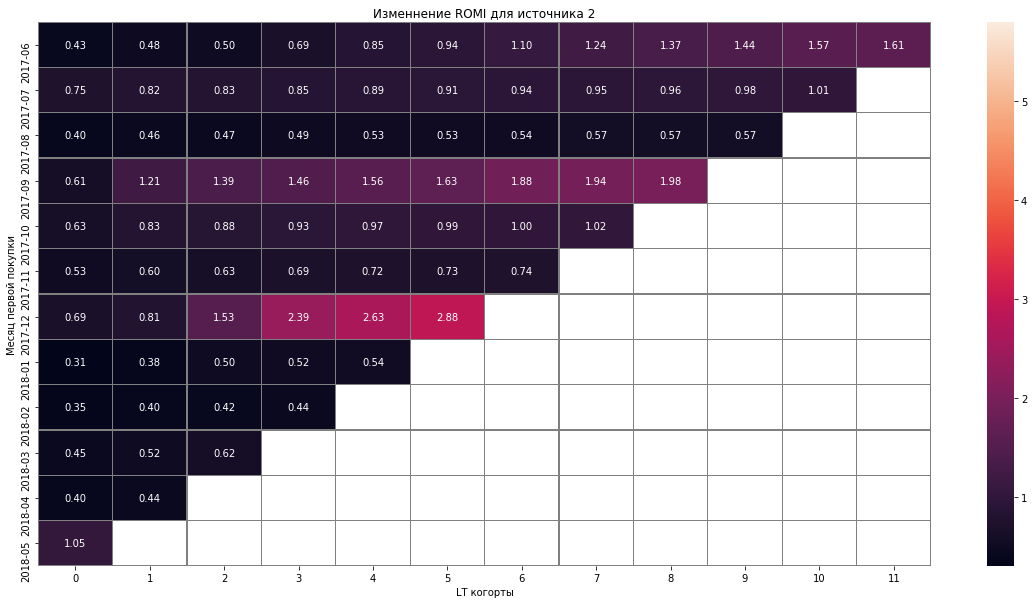

Источник трафика: 3


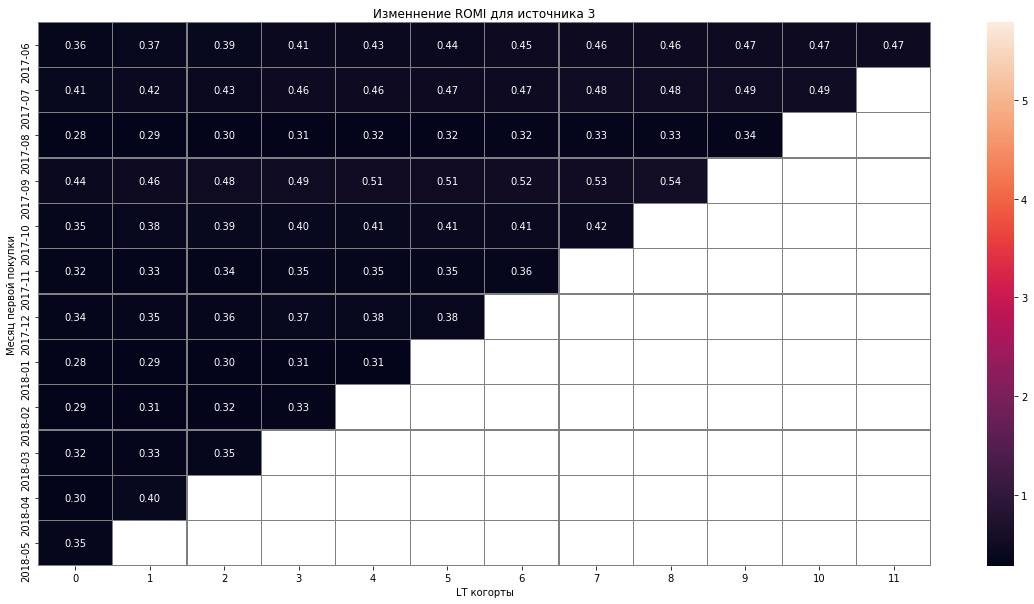

Источник трафика: 4


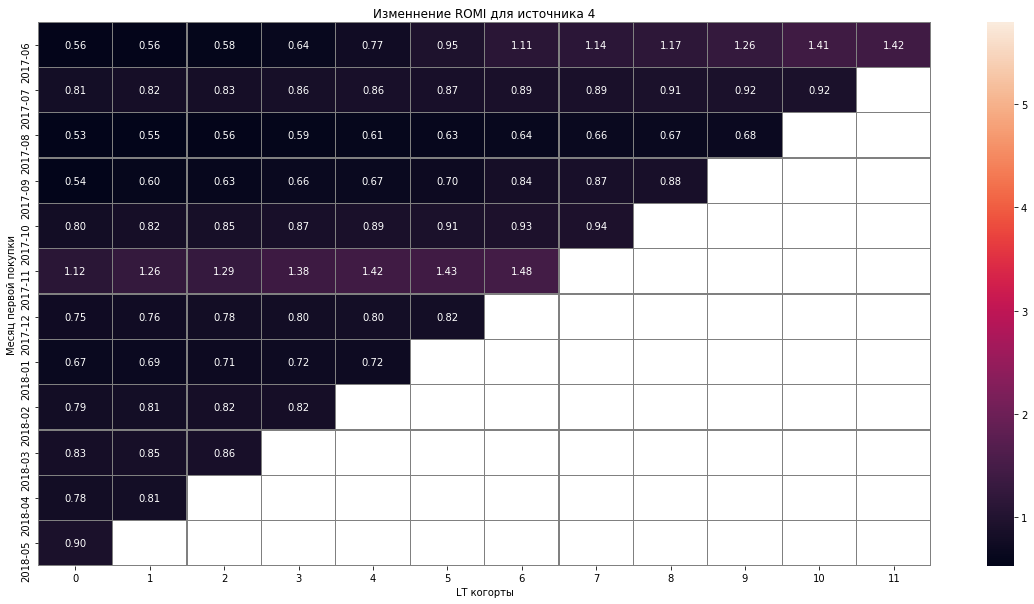

Источник трафика: 5


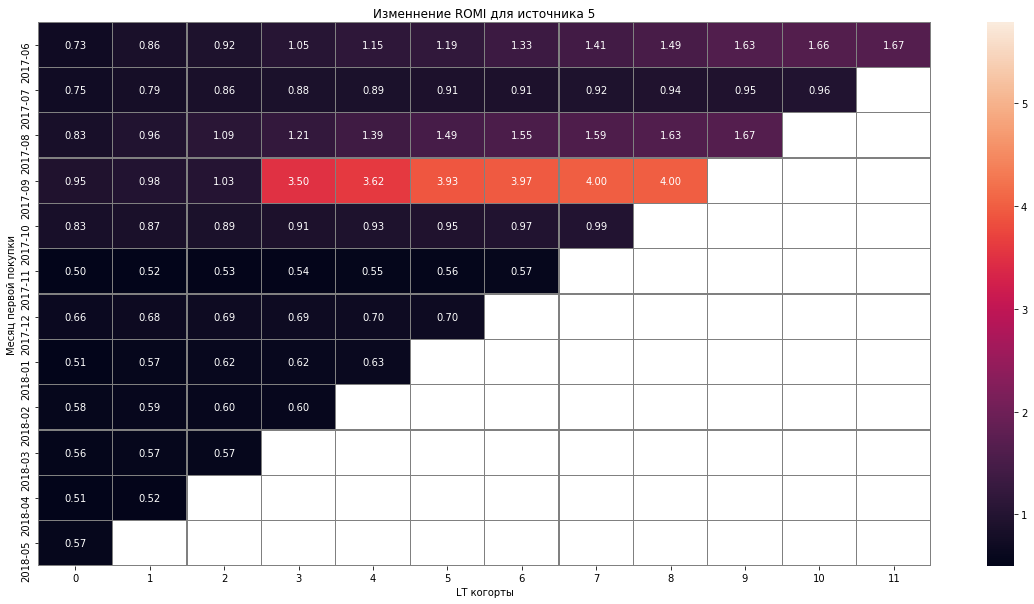

Источник трафика: 9


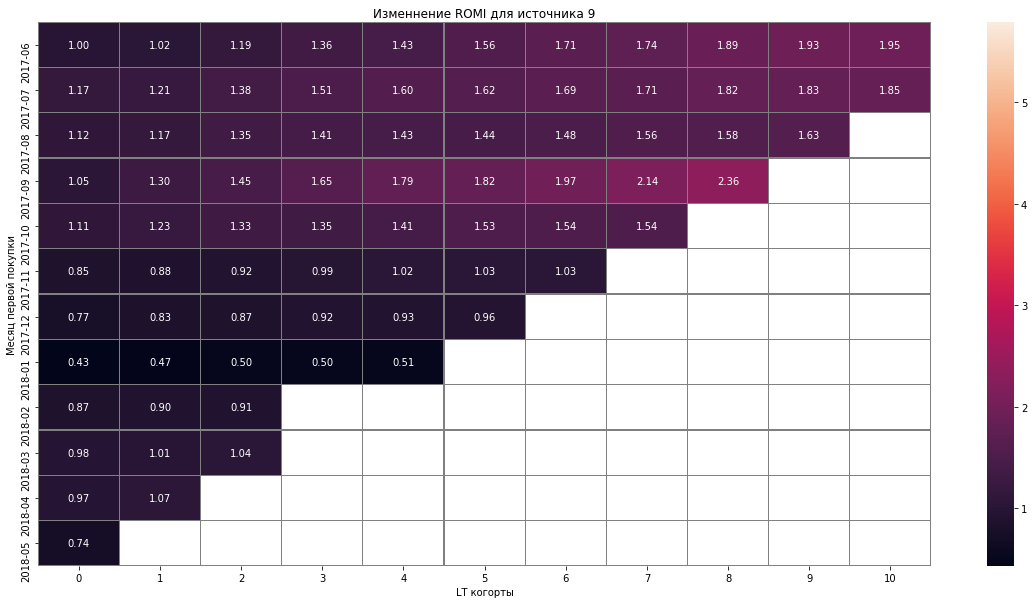

Источник трафика: 10


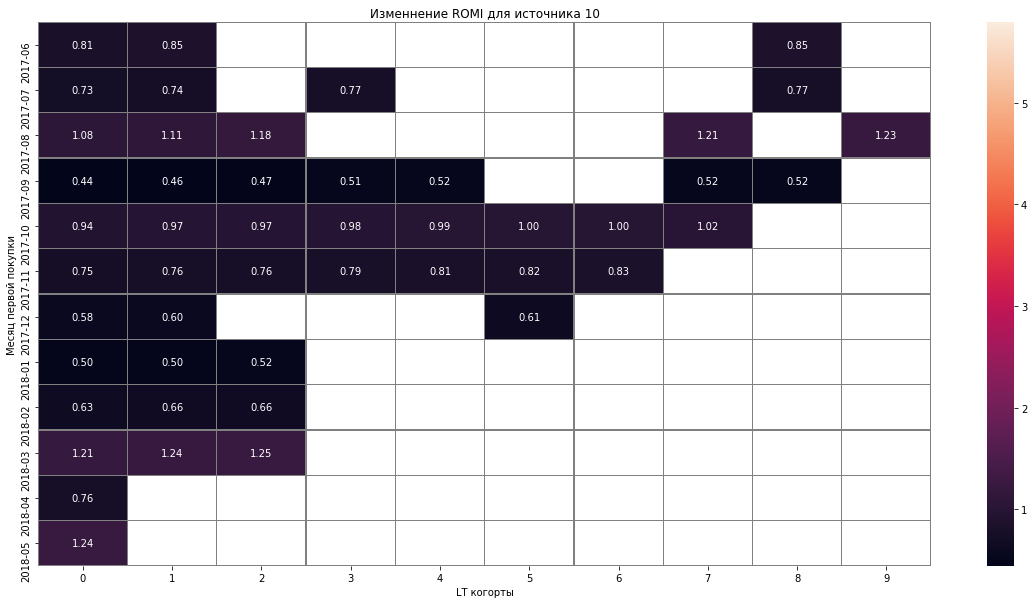

In [102]:
for source in df_romi['source_id'].unique():
    print('Источник трафика: {}'.format(source))
    
    fig, ax = plt.subplots(figsize = (20, 10))

    ax = sns.heatmap(
        data = df_romi.query('source_id == @source').pivot_table(
            index = 'first_buy_month_trimmed', 
            columns ='lifetime_months', 
            values = 'romi', 
            aggfunc = 'mean'
        ).cumsum(axis = 1),

        annot = True, 
        fmt = '.2f', 
        linewidths = 0.25, 
        linecolor = 'gray',
        vmax = romi_max
    )

    ax.set(xlabel = 'LT когорты', ylabel = 'Месяц первой покупки', title = 'Изменнение ROMI для источника '+ str(source))

    plt.show()

###### <div style="background:yellow;padding: 20px 10px">Вывод</div>

- Источник 1 [+] - первые 2 когорты были хорошими, после качество начало снижаться. С 6 месяца перестали окупаться.
- Источник 2 [+-] - 6 из 12 когорт окупились. Каждая третья не окупается. С 2018 качество сильно ухудшилось - не окупаются.
- Источник 3 [---] - ни одна из когорт не окупилась и, возможно, не окупится. ROMI > -60%
- Источник 4 [--] - длительная окупаемость, в течение 1 года. Только 1 когорта окупилась в первый месяц. И еще одна окупилась в течение 1 года.
- Источник 5 [-] - после октября 2017 качество снизилось, перестали окупаться. Хорошая когорта в сентябре - окупаемость в 4 раз.
- Источник 9 [+-] - стабильная окупаемость. Первые 5 когорт выходили на самоокупаемость на 1 месяц. После качество снизилось и самоокупаемость увеличиалась до 5-7 месяцев.
- Источник 10 [-] - пользователи из этого источника покупают не постоянно, качество довольно низкое. Окупилось 4 когорты из 12.

###### <div style="background:orange; padding: 20px 10px;">Доступные df</div>
- --

###### Общие 
- df_visits - лог посещений
- df_orders - лог покупок
- df_costs - лог расходов на маркетинг

###### Продуктовые df
- df_users - группировка юзеров по session_year, session_date и среднее кол-во визитов.
- df_retention - копия df_visits со столбцами даты первого визита и длительности сессии.
- cohorts - когорты из df_retention с группировкой по first_visit_month, lifetime. ['first_visit_month', 'lifetime', 'uid', 'cohort_users', 'retention']


###### Еком df
- first_order_time - время первого визита и первой покупки + категории. ['first_visit_datetime', 'first_buy_datetime', 'time_to_first_buy', 'category']

- df_ecom - копия df_orders + first_buy_month, buy_month, lifetime_month. ['buy_timestamp', 'revenue', 'uid', 'first_buy_datetime', 'buy_month', 'first_buy_month', 'lifetime_months', 'buy_date']

- average_buys - группировка df_ecom по среднему кол-ву покупок по когортам. ['users_cnt', 'orders_cnt', mean_orders']

- buy_cohorts_6 - таблица, в которой у юзеров в когортах есть 6 месяцев LT. ['first_buy_month', 'buy_month', 'revenue', 'users_cnt', 'lifetime', 'ltv']


###### Маркетинг df
- df_marketing - копия df_costs, объединенная с df_uniq_users по source_id, date+first_visit_date. ['source_id', 'month', 'date', 'costs', 'buyers_cnt', 'cac']

- df_buyers - копия first_visit_date, объединенная с df_visits для получения source_id, device. ['uid', 'source_id', 'device', 'first_visit_month', 'first_visit_date', 'first_order_month', 'first_order_date']

- df_romi - копия объединения покупателей и расходов. ['source_id', 'first_buy_month', 'lifetime_months', 'uid', 'revenue', 'month', 'costs', 'buyers_cnt', 'cac', 'ltv', 'romi', 'first_buy_month_trimmed']

## Шаг 3. Сформулируйте выводы и рекомендации

<a id="step3"></a>

- [x] 3.1. Определите источники трафика, на которые маркетологам стоит делать упор. Объясните свой выбор: на какие метрики вы ориентируетесь и почему;
- [x] 3.2. Опишите выводы, которые вы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции;
- [x] 3.3. Подведите итоги когортного анализа. Определите самые перспективные для компании когорты клиентов;

### 3.1. Определите источники трафика, на которые маркетологам стоит делать упор. Объясните свой выбор: на какие метрики вы ориентируетесь и почему; 

<a id="step3-1"></a>

In [103]:
df_romi

,source_id,first_buy_month,lifetime_months,uid,revenue,month,costs,buyers_cnt,cac,ltv,romi,first_buy_month_trimmed
0,1,2017-06-01,0,190,1378.70,2017-06-01,1103.93,190,5.810158,7.256316,1.248902,2017-06
1,1,2017-06-01,1,16,414.98,2017-06-01,1103.93,190,5.810158,2.184105,0.375912,2017-06
2,1,2017-06-01,2,10,419.43,2017-06-01,1103.93,190,5.810158,2.207526,0.379943,2017-06
3,1,2017-06-01,3,9,714.24,2017-06-01,1103.93,190,5.810158,3.759158,0.646998,2017-06
4,1,2017-06-01,4,12,811.20,2017-06-01,1103.93,190,5.810158,4.269474,0.734829,2017-06
...,...,...,...,...,...,...,...,...,...,...,...,...
509,10,2018-03-01,0,186,638.44,2018-03-01,526.41,186,2.830161,3.432473,1.212819,2018-03
510,10,2018-03-01,1,5,12.71,2018-03-01,526.41,186,2.830161,0.068333,0.024145,2018-03
511,10,2018-03-01,2,3,6.29,2018-03-01,526.41,186,2.830161,0.033817,0.011949,2018-03
512,10,2018-04-01,0,107,261.93,2018-04-01,344.72,107,3.221682,2.447944,0.759834,2018-04


In [104]:
profit = pd.merge(df_romi.groupby('source_id').agg({'revenue' : 'sum'}).reset_index(), df_costs.groupby('source_id').agg({'costs' : 'sum'}).reset_index(), on = 'source_id')

In [105]:
profit['profit'] = profit['revenue'] - profit['costs']
profit.sort_values(by = 'profit', ascending = False)

,source_id,revenue,costs,profit
0,1,31090.55,20833.27,10257.28
1,2,46923.61,42806.04,4117.57
4,5,52624.02,51757.10,866.92
5,9,5759.40,5517.49,241.91
6,10,4450.33,5822.49,-1372.16
3,4,56693.41,61073.60,-4380.19
2,3,54511.24,141321.63,-86810.39


- Источник 1 [+] - первые 2 когорты были хорошими, после качество начало снижаться. С 6 месяца перестали окупаться.
- Источник 2 [+-] - 6 из 12 когорт окупились. Каждая третья не окупается. С 2018 качество сильно ухудшилось - не окупаются.
- Источник 9 [+-] - стабильная самоокупаемость. Первые 5 когорт выходили на самоокупаемость на 1 месяц. После качество снизилось и самоокупаемость увеличиалась до 5-7 месяцев. Поскольку бюджет небольшой - пусть остается, лишним не будет. Вдруг какие-нибудь побочные эффекты сработают.
- Источники 3, 4 и 5 - имеют большой бюджет и минусовую или околонулевую окупаемость. Лучше этот бюджет направить на Источник 1.
- Источник 10 - небольшой минус, но и бюджет крайне мал. Возможно, Есть побочные эффекты от этого источника. Аналогично как и от 9. 
---
Ориентировался на ROMI по когортам. Если ROMI больше единицы, значит источник как минимум окупается.
Дополнительно рассчитал сумму доходов и расходов по источникам, что наглядно продемонстрировало ситуацию и помогло выдвинуть конечные рекомендации.

### 3.2. Опишите выводы, которые вы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции;

<a id="step3-2"></a>

###### Маркетинг
Проанализировал источники трафика по совокупным показателям окупаемости и общим расход\доход. Исходя из этого стало ясно, какие источники лучше использовать и куда направлять бюджет.

###### Еком
При исследовании данных электронной коммерции: 
- рассчитал кол-во покупок на одного покупателя
- LTV
- размер среднего чека. 

На графике изменения цены среднего чека есть очевидные пики, которые приходятся к праздникам.


Больше всего покупок совершается в первый час после первого визита. Это значит, что люди приходят из источников трафика с уже понятным интентом и совершают покупку.

Существуют какие-то покупки, где время первого визита == времени покупки. Назвал их "автоматическая покупка", потому что не знаю, что это такое и почему так происходит. Возможно, баг, а возможно, это интеграции со сторонними сервисами, которые через API автоматически покупают.

LTV на протяжении доступного периода времени растет. Значит, пользователи возвращаются и совершают повторные покупки.

###### Продуктовые
Есть повторные покупки.
Ретеншен второго месяца 6,52%.

Хорошая когорта 6-2017 года - у нее и ретеншен хороший, и количество покупок, и LTV.

---
В целом, все метрики лучше выглядят в 2017 году по сравнению с 2018.

### 3.3. Подведите итоги когортного анализа. Определите самые перспективные для компании когорты клиентов;

<a id="step3-3"></a>

In [106]:
buy_cohorts = df_ecom.copy()

In [107]:
buy_cohorts = buy_cohorts.groupby(['first_buy_month', 'buy_month']).agg({'revenue' : 'sum'}).reset_index()
buy_cohorts.head()

,first_buy_month,buy_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [108]:
# Объединение таблицы с суммой ревеню и покупателями по first_buy_month
buy_cohorts = buy_cohorts.merge(new_buyers, on = 'first_buy_month')
buy_cohorts.head(20)

,first_buy_month,buy_month,revenue,users_cnt
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,2023
2,2017-06-01,2017-08-01,885.34,2023
3,2017-06-01,2017-09-01,1931.30,2023
4,2017-06-01,2017-10-01,2068.58,2023
5,2017-06-01,2017-11-01,1487.92,2023
6,2017-06-01,2017-12-01,1922.74,2023
7,2017-06-01,2018-01-01,1176.56,2023
8,2017-06-01,2018-02-01,1119.15,2023
9,2017-06-01,2018-03-01,1225.51,2023


In [109]:
# Вычисление LT когорты для рассчета LTV
buy_cohorts['lifetime'] = ((buy_cohorts['buy_month'] - buy_cohorts['first_buy_month']) / np.timedelta64(1, 'M')).round().astype('int')

In [110]:
# Вычисление LTV для каждого месяца
buy_cohorts['ltv'] = buy_cohorts['revenue'] / buy_cohorts['users_cnt']

In [111]:
# Изменение отображения first_buy_month на год-месяц
buy_cohorts['first_buy_month'] = buy_cohorts['first_buy_month'].dt.strftime('%Y-%m')

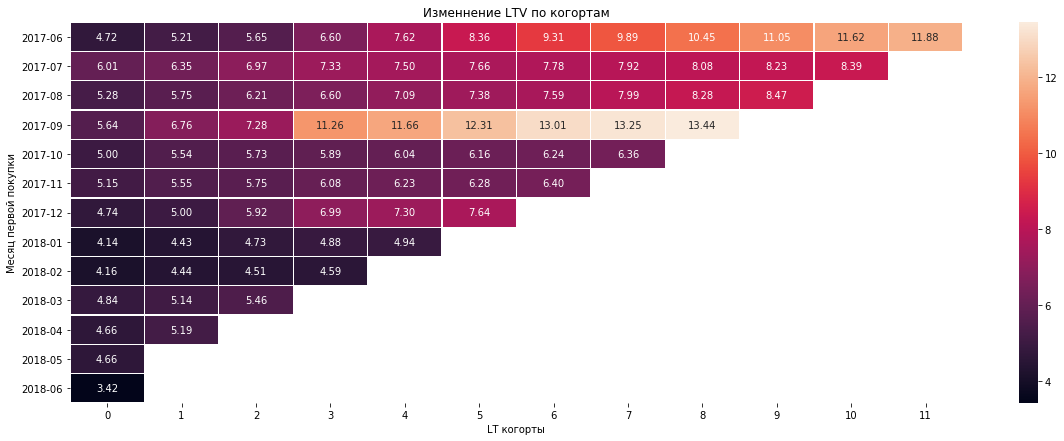

In [112]:
fig, ax = plt.subplots(figsize = (20, 7))

sns.heatmap(
    buy_cohorts.pivot_table(
        index = 'first_buy_month',
        columns = 'lifetime',
        values = 'ltv',
        aggfunc = 'mean'
    )
    .cumsum(axis = 1),
    
    annot = True, 
    fmt = '.2f', 
    linewidths = 0.25, 
    linecolor = 'white'
)
ax.set(xlabel = 'LT когорты', ylabel = 'Месяц первой покупки', title = 'Изменнение LTV по когортам')

plt.show()

Если средний LTV за 10 месяцев == 10 долларов, а за 5 месяцев == 8 долларов, а за первый месяц == 5 долларов, то выходит, что в первый месяц проект получает 50% прибыли, в следующие 4 месяца еще 30 % дохода и в последние 5 месяцев оставшиеся 20%.

Получается, перспективными являются когорты с 1 по 5 месяц, которые принесли от 5 и до 8 долларов.

<div class="alert alert-danger">

**Комментарий ревьюера**

Кирилл, отлично справился с проектом 👍 Успешно рассчитал основные метрики, сделал замечательные выводы и дал хорошие рекомендации. Местами хромает визуализация. И есть несколько замечаний, помимо замечаний есть и рекомендации. Уверен, что ты быстро справишься с доработками. Удачи тебе </div>

<div class="alert alert-block alert-info">
Внес исправления. По некоторым появились вопросы, не совсем ясно что и как делать. <br>
1. Например, про когорты с квадратом 6х6 месяцев.<br>
2. Вот этот комментарий не понял:
<div class="alert alert-warning">

**Комментарий ревьюера**
    
Отличный расчет retention rate 👍Молодец, что убрал нулевой возраст когорт, чтобы скорректировать градиентную заливку. В таблицу можно еще добавить расчет среднего по времени жизни среди всех когорт `visits_retention_pivot.loc['mean'] = pivot.mean()`

Какой еще вывод можно сделать? Показать за 1 месяц жизни для свежий когорт хуже? Получается что тренд убывающий, качество трафика ухудшилось
</div>

3. И еще про проседание графика по LTV в сентябре - вроде бы взял все когорты, а он все равно проседает.<br>
Спасибо
</div>

<div class="alert alert-success">

**Комментарий ревьюера V2**

Хорошая доработка проекта 👍 На твои вопросы тоже ответил в комментариях. Проект принимаю, успехов тебе в дальнейшей учебе 😉</div>